## Student Performance Indicator

Life Cycle of ML Project

1. Understanding problem statement
2. Data Collection 
3. Data checks to perform
4. Exploratory Data Analysis
5. Data Pre-processing
6. Model Training 
7. Choosing best model

1. Understanding Problem Statement

How is the student's performance is affected by various other parameters like gender, ethnicity, parental level of education, lunch and test preparation course.


2. Data Collection

Dataset source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams



In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



In [4]:
import pandas as pd

# Load the CSV
df = pd.read_csv("data/StudentsPerformance.csv")

# Rename columns
df.rename(columns={
    'race/ethnicity': 'race_ethnicity',
    'parental level of education': 'parental_level_of_education',
    'test preparation course': 'test_preparation_course',
    'reading score': 'reading_score',
    'writing score': 'writing_score',
    'math score':'math_score'
}, inplace=True)

# Save the modified CSV
df.to_csv("data/StudentsPerformance.csv", index=False)

In [6]:
df = pd.read_csv('data/StudentsPerformance.csv')

In [7]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
df.shape

(1000, 8)

3. Data checks to perform
i) check missing values
ii)check duplicates
iii) check data types
iv) check number of unique values for each column
v) check statistics of data set
vi) check various categories present in different categorical column


In [9]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [12]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [13]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


all means are very close to each other, SD is also very close, math min = 0, writing min = 10, reading min = 17


In [14]:
print("Categories in 'gender' variable:   ", end=' ')
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable:   ", end=' ')
print(df['race_ethnicity'].unique())

print("Categories in 'parental level of education' variable:   ", end=' ')
print(df['parental_level_of_education'].unique())


print("Categories in 'lunch' variable:   ", end=' ')
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:   ", end=' ')
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:    ['female' 'male']
Categories in 'race/ethnicity' variable:    ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:    ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:    ['standard' 'free/reduced']
Categories in 'test preparation course' variable:    ['none' 'completed']


In [12]:
# defining numerical and categorical features
numeric_features = [feature for feature in df.columns if df[feature].dtype!='O']
categorical_features = [feature for feature in df.columns if df[feature].dtype=='O']

# print columns
print('We have {} numerical features: {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features: {}'.format(len(categorical_features), categorical_features))





We have 3 numerical features: ['math score', 'reading score', 'writing score']

We have 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [15]:
# From observation we have 3 different columns for score -> we can combine all 3 of these and create a new column Total Score
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']

df['average'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [16]:
reading_full_count = df[df['reading_score'] == 100]['reading_score'].count()
writing_full_count = df[df['writing_score'] == 100]['writing_score'].count()
math_full_count = df[df['math_score'] == 100]['math_score'].count()

print(f"Number of students with full marks in Reading: {reading_full_count}")

print(f"Number of students with full marks in Writing: {writing_full_count}")

print(f"Number of students with full marks in Math: {math_full_count}")


Number of students with full marks in Reading: 17
Number of students with full marks in Writing: 14
Number of students with full marks in Math: 7


In [17]:
reading_full_count = df[df['reading_score'] == 100]['reading_score'].count()
writing_full_count = df[df['writing_score'] == 100]['writing_score'].count()
math_full_count = df[df['math_score'] == 100]['math_score'].count()

print(f"Number of students with full marks in Reading: {reading_full_count}")

print(f"Number of students with full marks in Writing: {writing_full_count}")

print(f"Number of students with full marks in Math: {math_full_count}")


Number of students with full marks in Reading: 17
Number of students with full marks in Writing: 14
Number of students with full marks in Math: 7


In [18]:
reading_less_20 = df[df['reading_score'] <= 20]['reading_score'].count()
writing_less_20 = df[df['writing_score'] <= 20]['writing_score'].count()
math_less_20 = df[df['math_score'] <= 20]['math_score'].count()

print(f"Number of students with less than 20 marks in Reading: {reading_less_20}")

print(f"Number of students with less than 20 marks in Writing: {writing_less_20}")

print(f"Number of students with less than 20 marks in Math: {math_less_20}")


Number of students with less than 20 marks in Reading: 1
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Math: 4


In Maths students have performed worst, In reading section they have performed better.


### Data Visualization

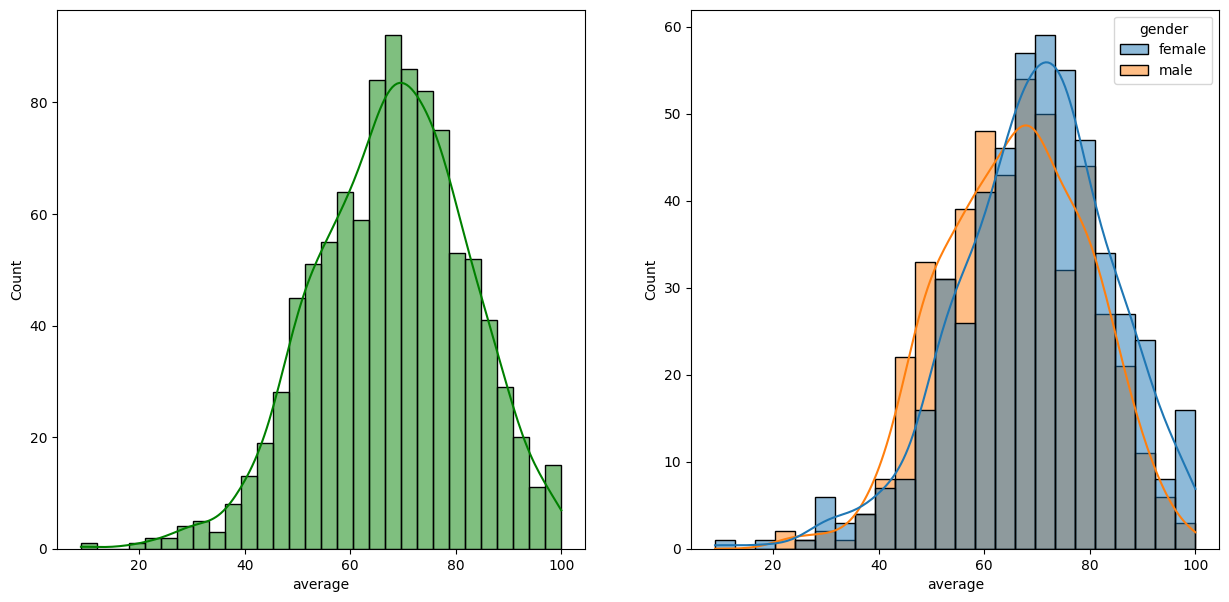

In [19]:
fig, axs = plt.subplots(1,2,figsize=(15, 7))
# 1 row 2 columns
plt.subplot(121)
# 1 row, 2 columns, 1st subplot
sns.histplot(data = df, x = 'average', bins = 30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data= df, x = 'average', kde=True, hue='gender')
plt.show()

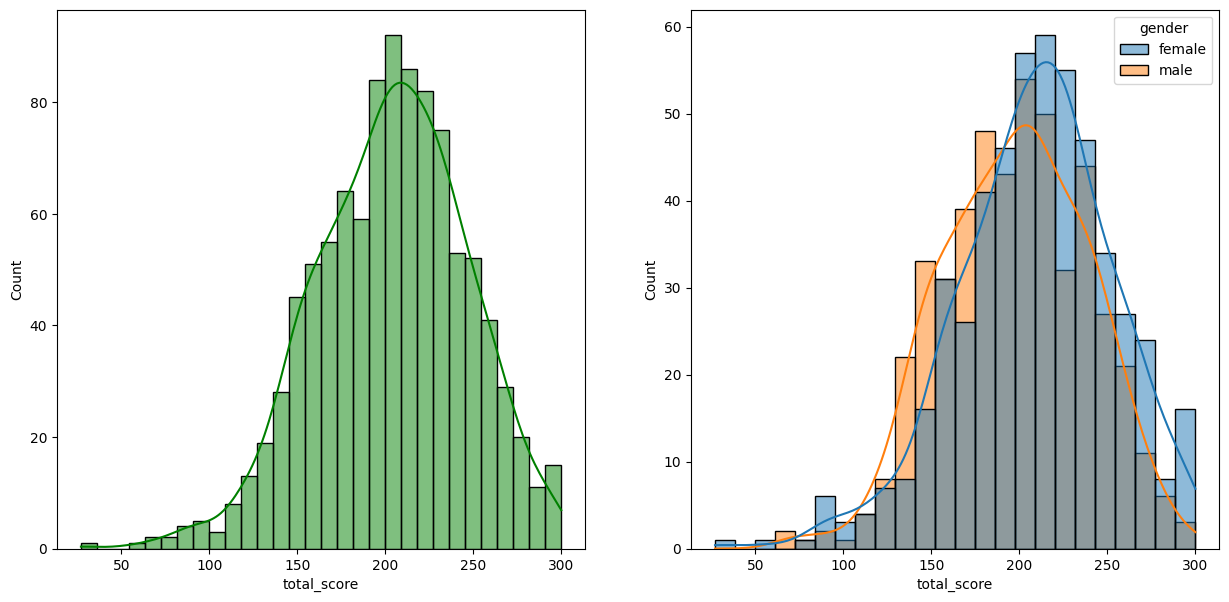

In [21]:
# For Total Score

fig, axs = plt.subplots(1,2,figsize=(15, 7))
# 1 row 2 columns
plt.subplot(121)
# 1 row, 2 columns, 1st subplot
sns.histplot(data = df, x = 'total_score', bins = 30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data= df, x = 'total_score', kde=True, hue='gender')
plt.show()

Female students tends to perform better than Male students.


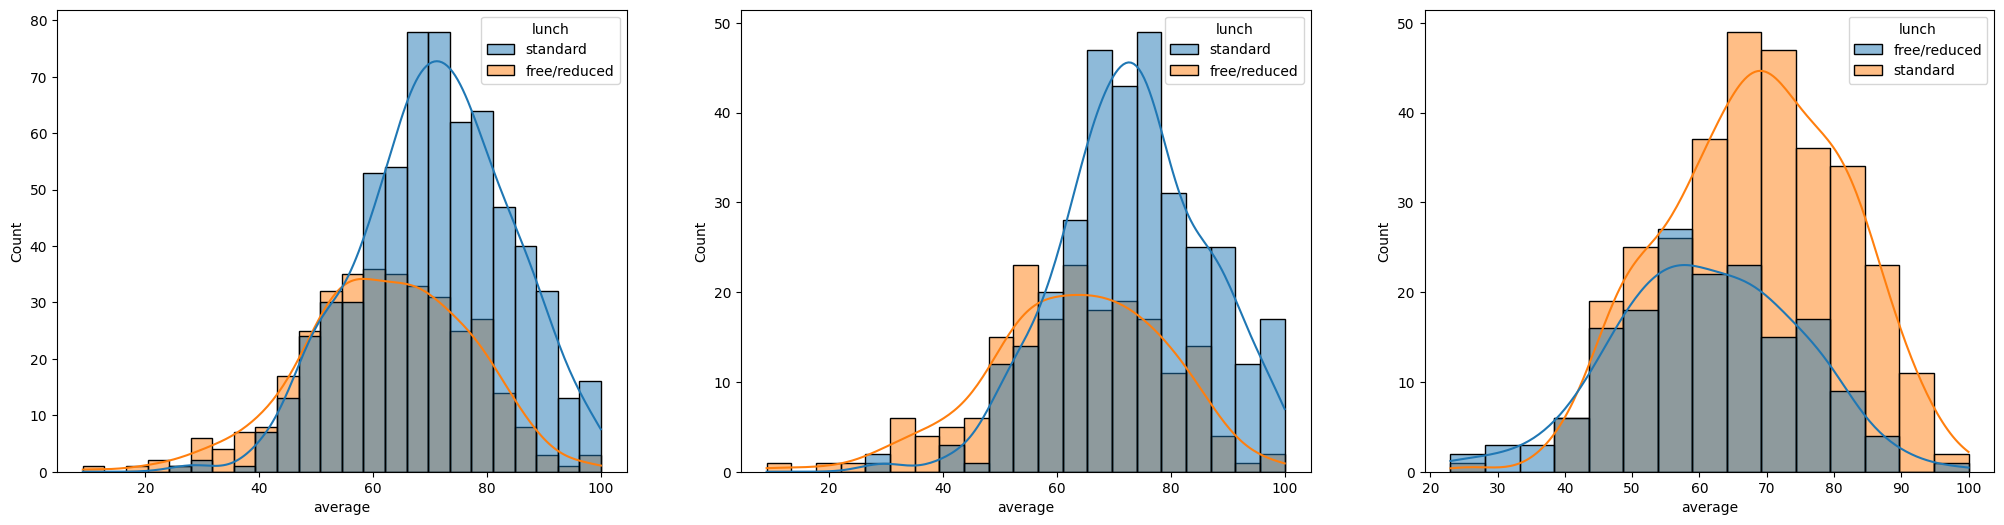

In [22]:
plt.subplots(1, 3, figsize = (25, 6))
plt.subplot(131)
sns.histplot(data = df, x = 'average', kde = True, hue = 'lunch')
plt.subplot(132)
sns.histplot(data = df[df.gender =='female'], x= 'average',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data= df[df.gender =='male'],x='average',kde=True, hue='lunch')
plt.show()

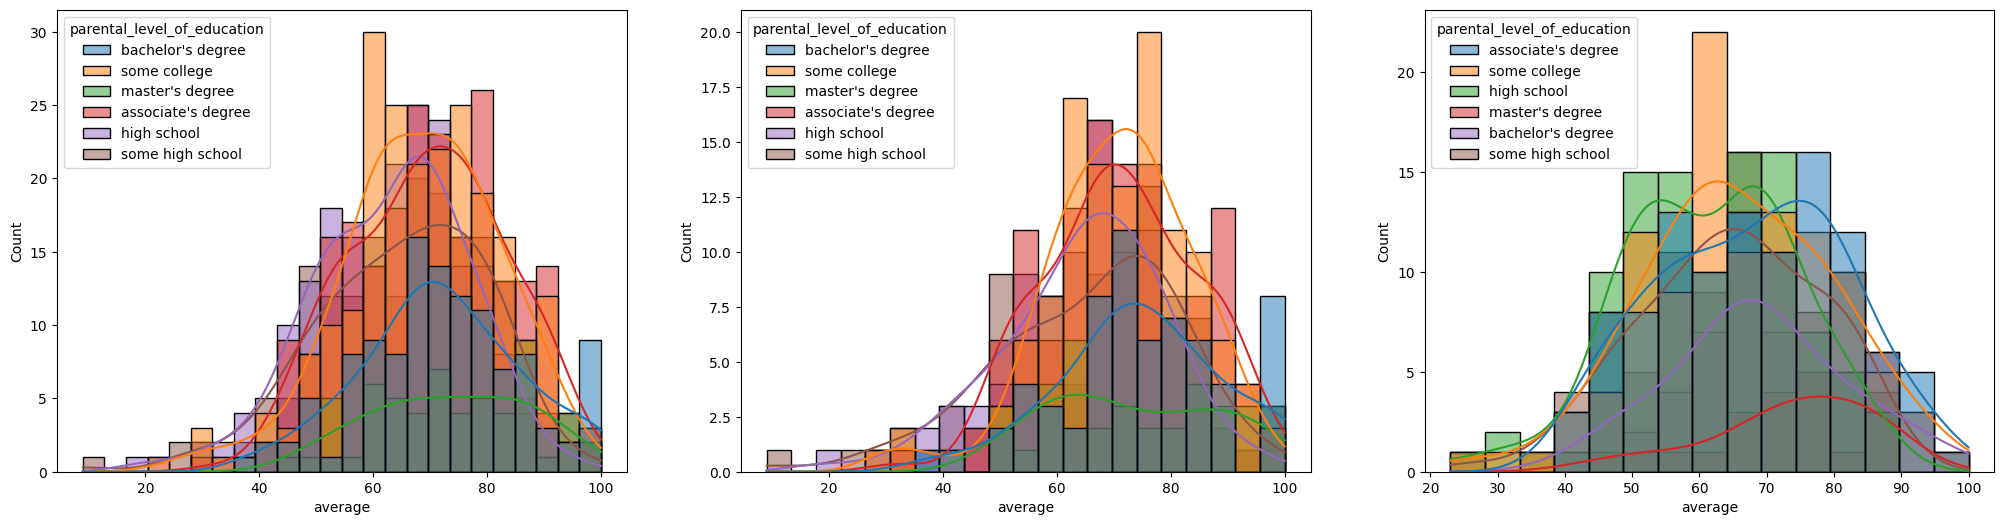

In [23]:
plt.subplots(1, 3, figsize = (25, 6))
plt.subplot(131)
sns.histplot(data = df, x = 'average', kde = True, hue = 'parental_level_of_education')
plt.subplot(132)
sns.histplot(data = df[df.gender =='female'], x= 'average',kde=True,hue='parental_level_of_education')
plt.subplot(133)
sns.histplot(data= df[df.gender =='male'],x='average',kde=True, hue='parental_level_of_education')
plt.show()

In general parental level of education doesn't help student perform well in the exam.
For Male students the parents who have masters or associate degree tend to perform well.
For Female Students there is no effect.


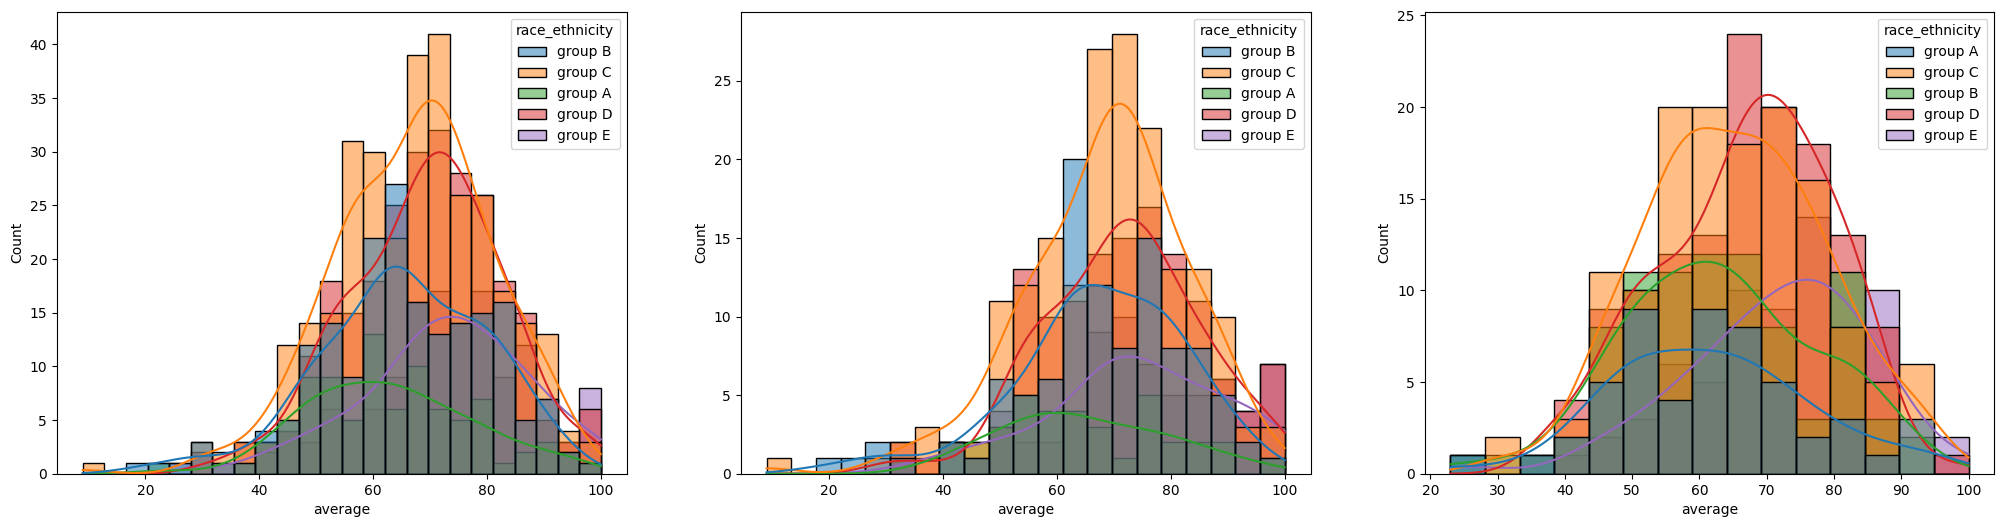

In [24]:
plt.subplots(1, 3, figsize = (25, 6))
plt.subplot(131)
sns.histplot(data = df, x = 'average', kde = True, hue = 'race_ethnicity')
plt.subplot(132)
sns.histplot(data = df[df.gender =='female'], x= 'average',kde=True,hue='race_ethnicity')
plt.subplot(133)
sns.histplot(data= df[df.gender =='male'],x='average',kde=True, hue='race_ethnicity')
plt.show()

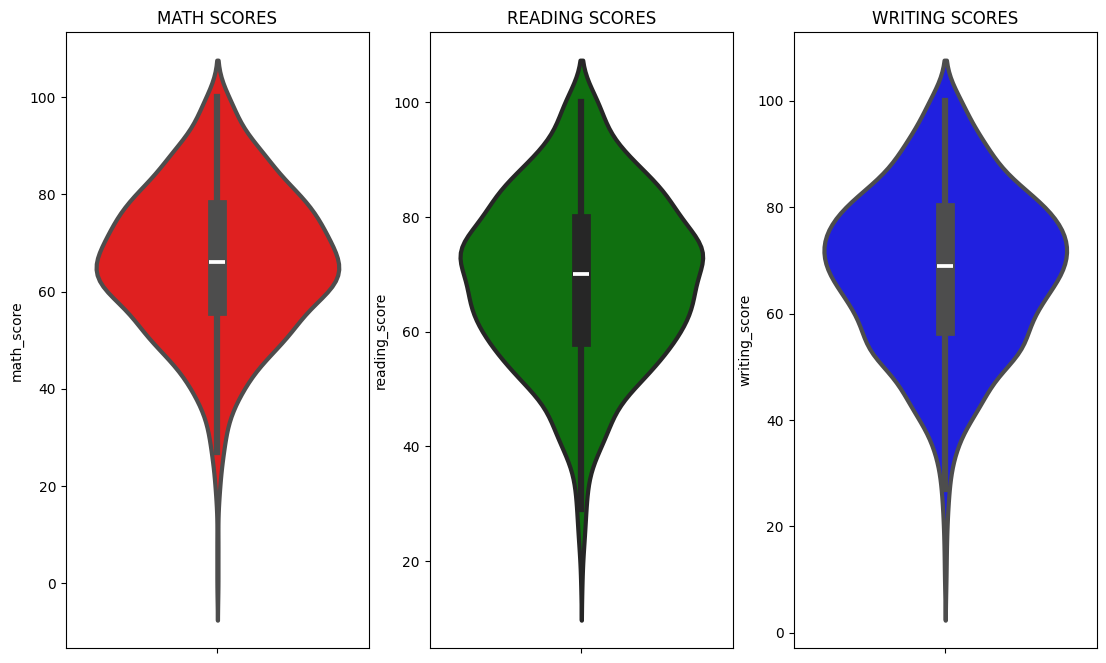

In [25]:
# Max score of students in all 3 subjects
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data = df, color='red',linewidth=3)
plt.subplot(1,4,2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data = df, color='green',linewidth=3)
plt.subplot(1,4,3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data = df, color='blue',linewidth=3)

plt.show()


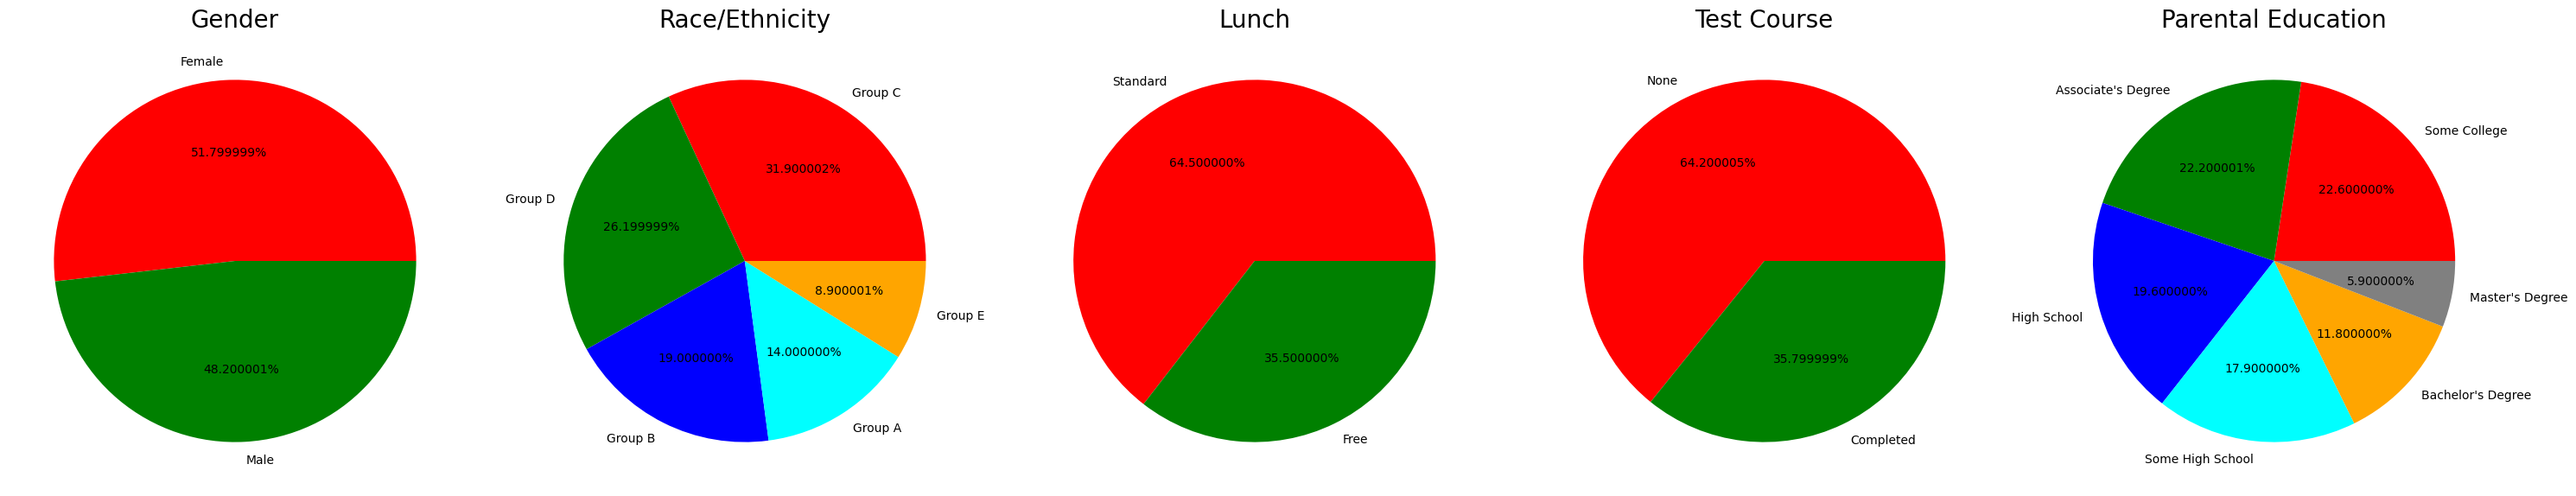

In [27]:
# Multi variate analysis using pie chart
plt.rcParams['figure.figsize'] = (30, 12)
plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels ='Female','Male'
color=['red','green']

plt.pie(size, colors = color, labels = labels, autopct='%2f%%')
plt.title('Gender',fontsize = 20)
plt.axis('off')



plt.subplot(1,5,2)
size = df['race_ethnicity'].value_counts()
labels ='Group C','Group D','Group B','Group A','Group E'
color=['red','green','blue','cyan','orange']

plt.pie(size, colors = color, labels = labels, autopct='%2f%%')
plt.title('Race/Ethnicity',fontsize = 20)
plt.axis('off')



plt.subplot(1,5,3)
size = df['lunch'].value_counts()
labels ='Standard','Free'
color=['red','green']

plt.pie(size, colors = color, labels = labels, autopct='%2f%%')
plt.title('Lunch',fontsize = 20)
plt.axis('off')



plt.subplot(1,5,4)
size = df['test_preparation_course'].value_counts()
labels ='None','Completed'
color=['red','green']

plt.pie(size, colors = color, labels = labels, autopct='%2f%%')
plt.title('Test Course',fontsize = 20)
plt.axis('off')




plt.subplot(1,5,5)
size = df['parental_level_of_education'].value_counts()
labels ='Some College',"Associate's Degree",'High School','Some High School',"Bachelor's Degree", "Master's Degree"
color=['red','green','blue','cyan','orange','grey']

plt.pie(size, colors = color, labels = labels, autopct='%2f%%')
plt.title('Parental Education',fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()
plt.show()


#### Insights
1. No. of Male and Female Students are almost similar.
2. No. of Students in Group C are the most.
3. No. of Students having standard lunch are the most.
4. No. of Students who have not enrolled in any Test Course is high.
5. No. of Students whose parental educational level is 'Some College' is followed closely by Associate Degree.


#### Feature Wise evaluation

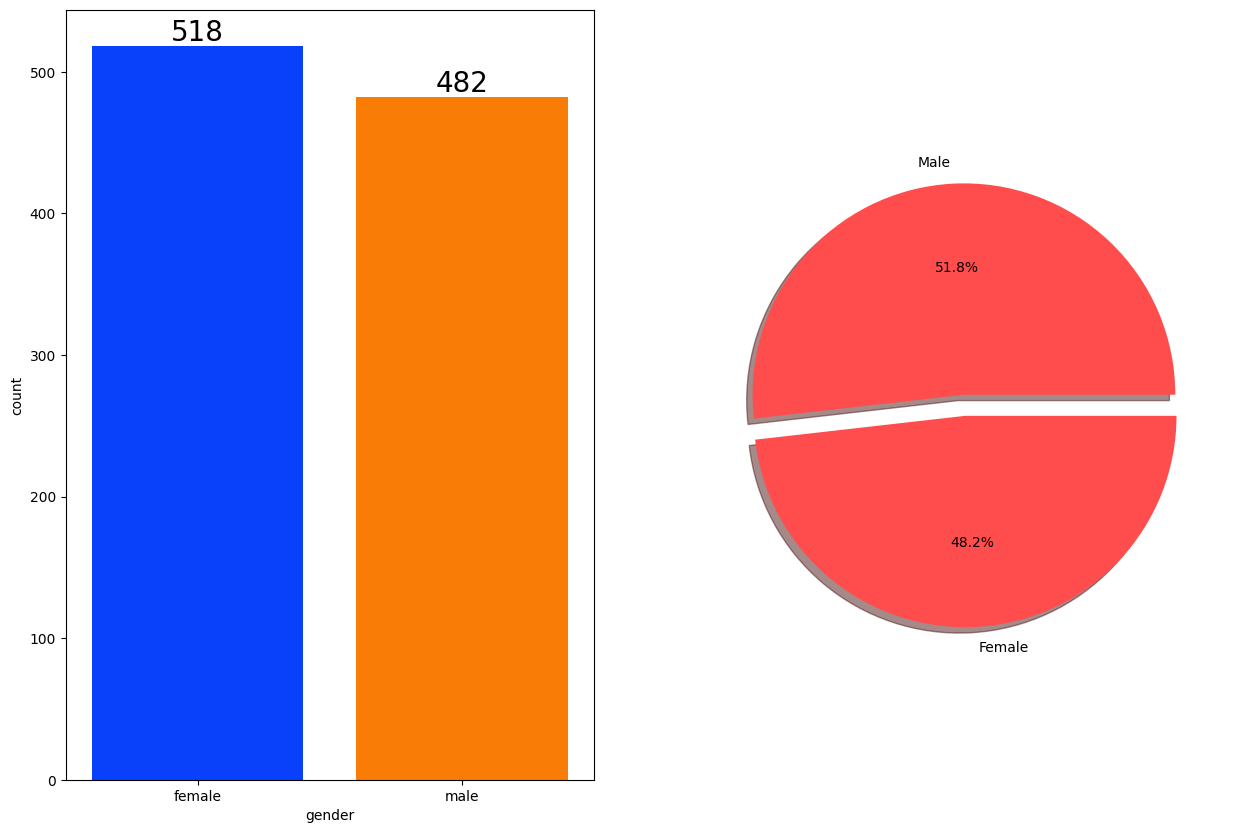

In [28]:
# Gender column
# How is the distribution? Does gender makes any difference in performance?
# UNIVARIATE ANALYSIS

f, ax = plt.subplots(1, 2, figsize = (15, 10))
sns.countplot(x = df['gender'], data = df, palette = 'bright', ax = ax[0], saturation = 0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black',size=20)

plt.pie(x=df['gender'].value_counts(), labels=['Male', 'Female'], explode=[0,0.1], autopct='%1.1f%%', shadow=True, colors=['#ff4d4d'])

plt.show()

Bi-variate Analysis
Does gender have any effect on student's performance


In [29]:
gender_group = df.groupby('gender').mean()
gender_group

TypeError: agg function failed [how->mean,dtype->object]

In [30]:
df['gender_numeric'] = df['gender'].map({'male': 0, 'female': 1})
gender_group = df.select_dtypes(include='number').groupby('gender_numeric').mean()

gender_group

,math_score,reading_score,writing_score,total_score,average
gender_numeric,,,,,
0,68.728216,65.473029,63.311203,197.512448,65.837483
1,63.633205,72.608108,72.467181,208.708494,69.569498


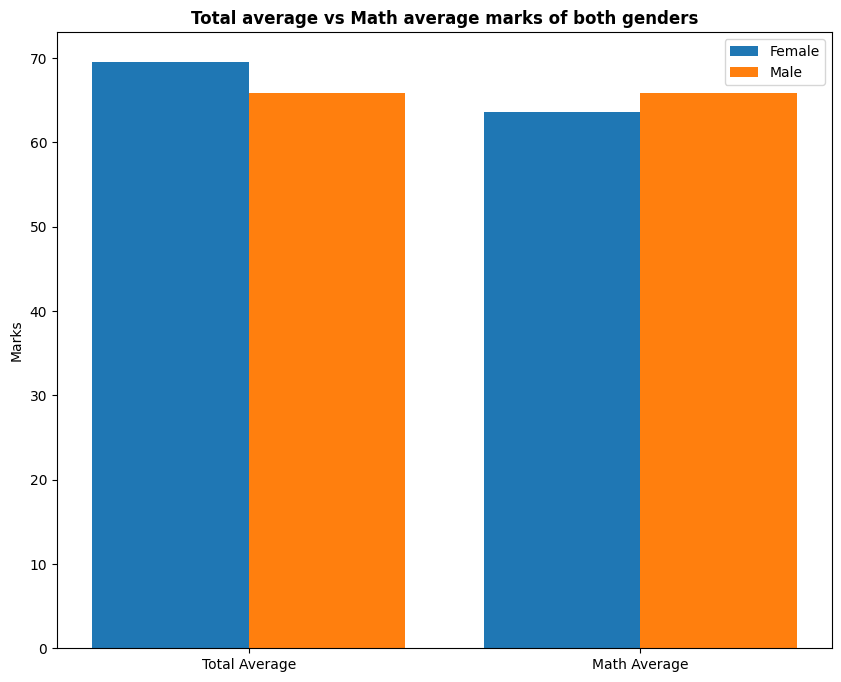

In [32]:
plt.figure(figsize=(10, 8))
X = ['Total Average', 'Math Average']
female_scores = [gender_group['average'][1], gender_group['math_score'][1]]
male_scores = [gender_group['average'][0], gender_group['average'][0]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, female_scores, 0.4, label = 'Female')
plt.bar(X_axis + 0.2, male_scores, 0.4,  label='Male')

plt.xticks(X_axis,X)
plt.ylabel('Marks')
plt.title('Total average vs Math average marks of both genders', fontweight='bold')

plt.legend()
plt.show()

Overall females have better score, but males have better avg. in Mathematics.


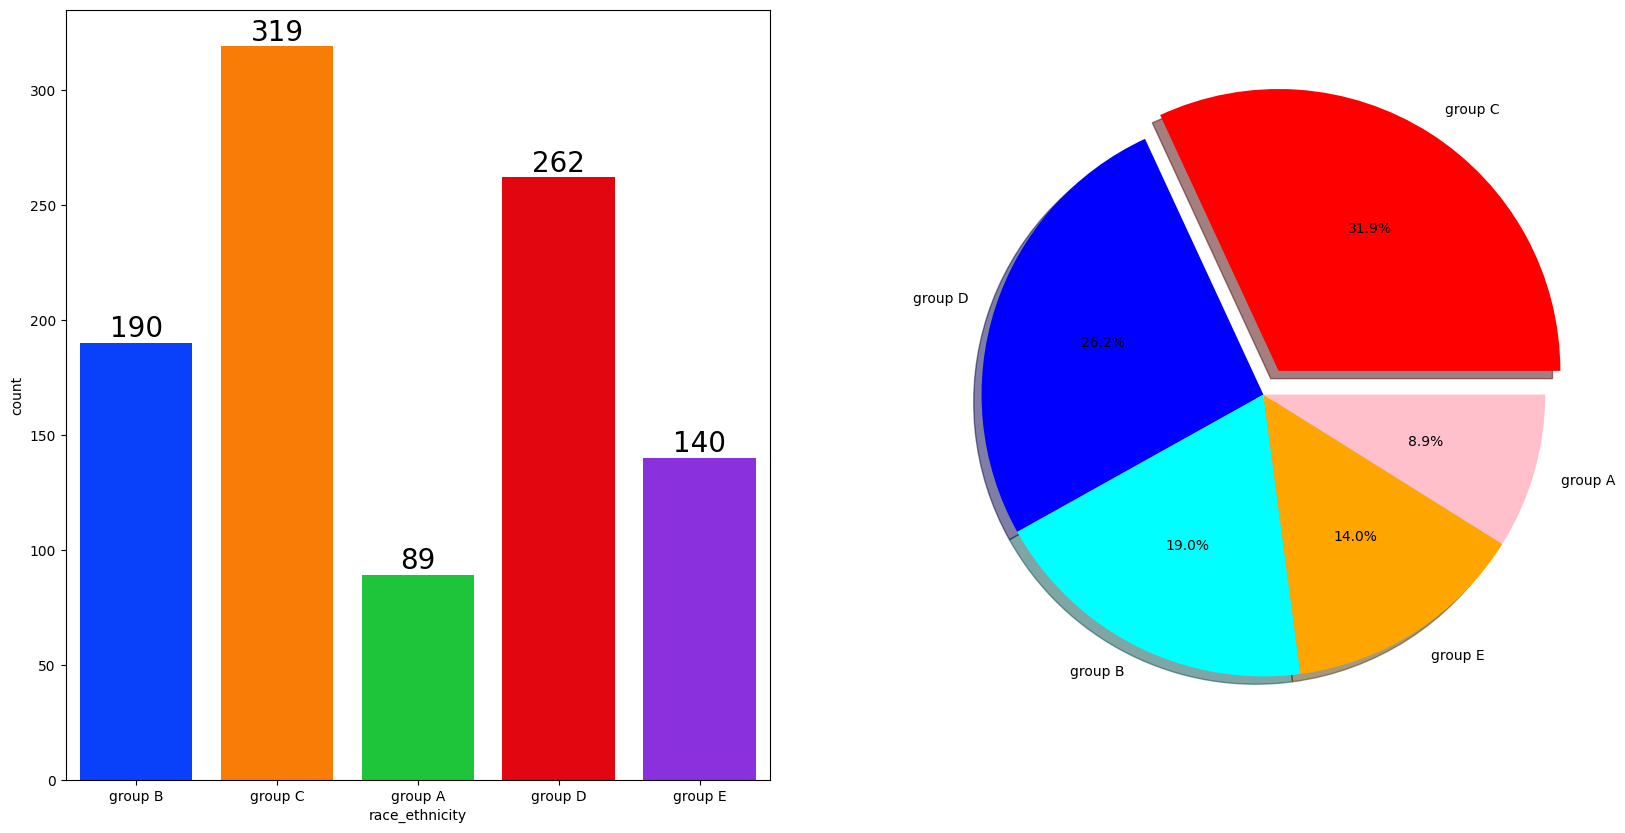

In [33]:
# Race/ethnicity
# How is the distribution? Does race makes any difference in performance?
# UNIVARIATE ANALYSIS

f, ax = plt.subplots(1, 2, figsize = (20, 10))
sns.countplot(x = df['race_ethnicity'], data = df, palette = 'bright', ax = ax[0], saturation = 0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black',size=20)

plt.pie(x=df['race_ethnicity'].value_counts(), labels=df['race_ethnicity'].value_counts().index, explode=[0.1, 0, 0, 0, 0], autopct='%1.1f%%', shadow=True, colors=['red', 'blue','cyan', 'orange','pink'])

plt.show()

Most of the students are from Group C, Group D

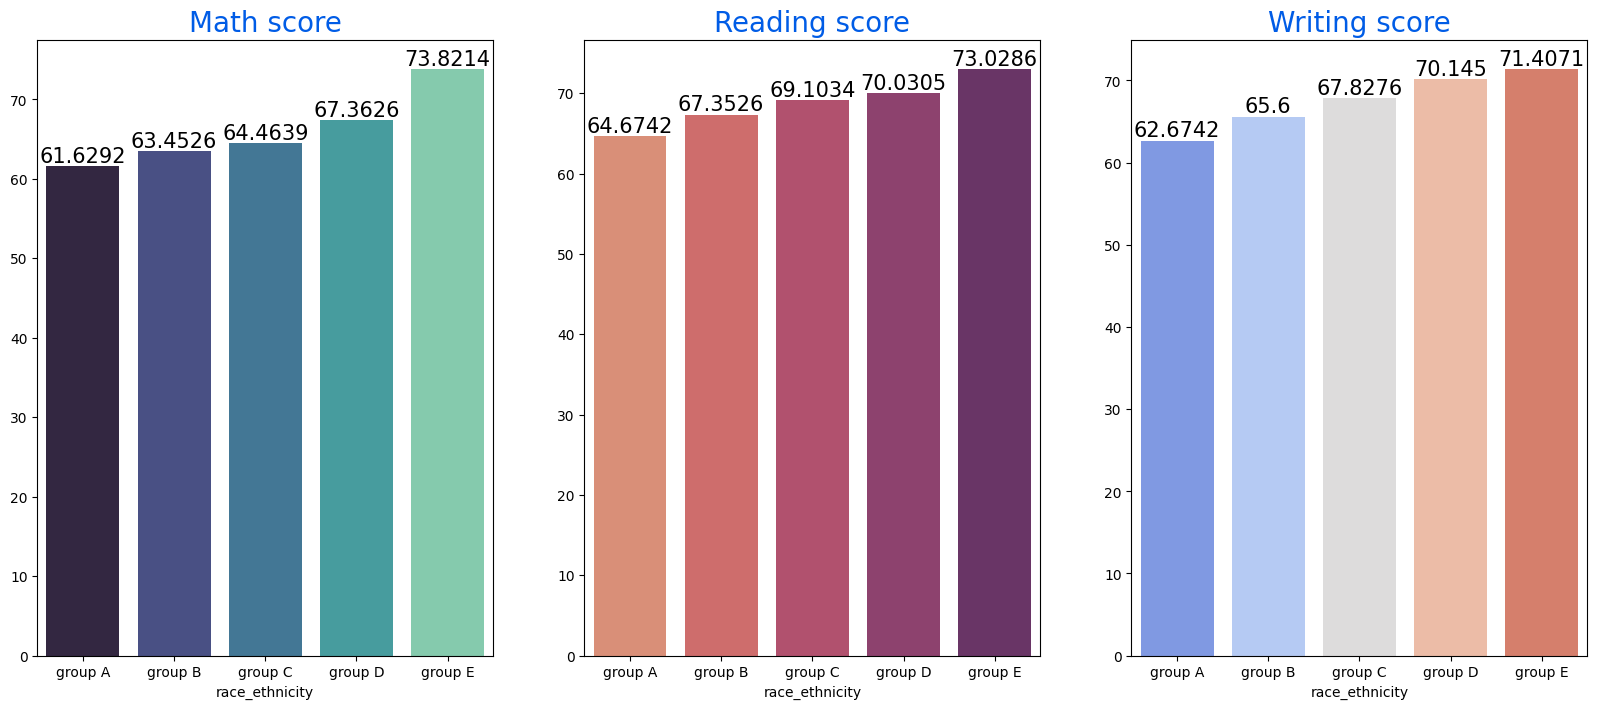

In [34]:
Group_data2 = df.groupby('race_ethnicity')
f,ax = plt.subplots(1, 3, figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index, y=Group_data2['math_score'].mean().values,palette = 'mako', ax = ax[0])
ax[0].set_title('Math score', color = '#005ce6', size=20)

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index, y=Group_data2['reading_score'].mean().values, palette='flare' ,ax=ax[1])
ax[1].set_title('Reading score', color='#005ce6', size= 20)
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=15)


sns.barplot(x=Group_data2['writing_score'].mean().index, y=Group_data2['writing_score'].mean().values, palette='coolwarm' ,ax=ax[2])
ax[2].set_title('Writing score', color='#005ce6', size= 20)
for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=15)



Group E students have performed best
Group A performance is poor.

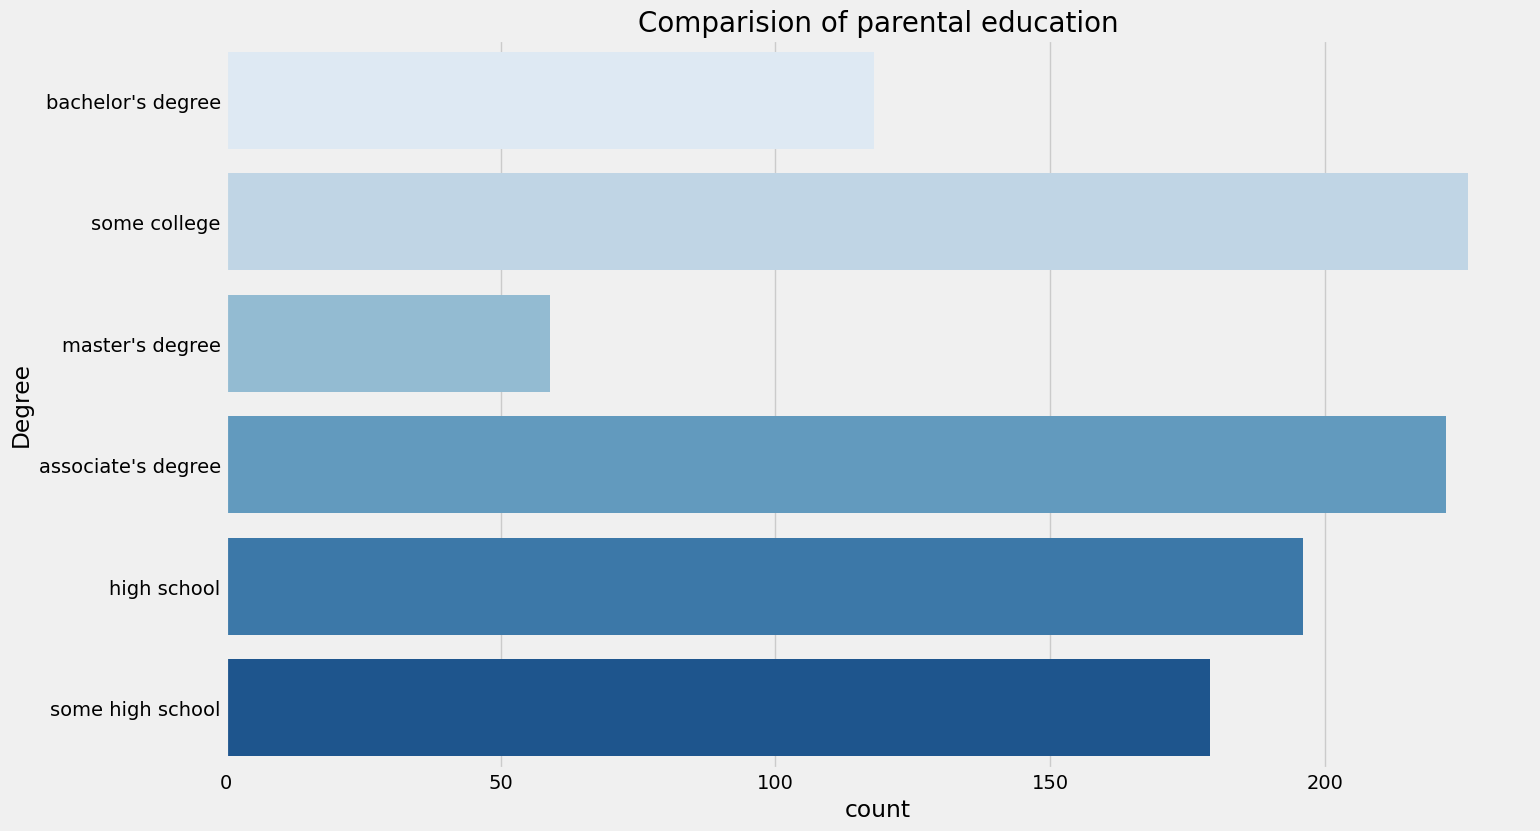

In [36]:
# Parental level of education 
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette='Blues')
plt.title('Comparision of parental education', fontweight = 30, fontsize = 20)
plt.xlabel('count')
plt.ylabel('Degree')
plt.show()

In [39]:
df.groupby('parental_level_of_education').agg('mean').plot(kind ='bar', figsize=(10, 10))
plt.legend(bbox_to_anchor = (1.05, 1), loc=2, borderaxespad=0.)
plt.show()


TypeError: agg function failed [how->mean,dtype->object]

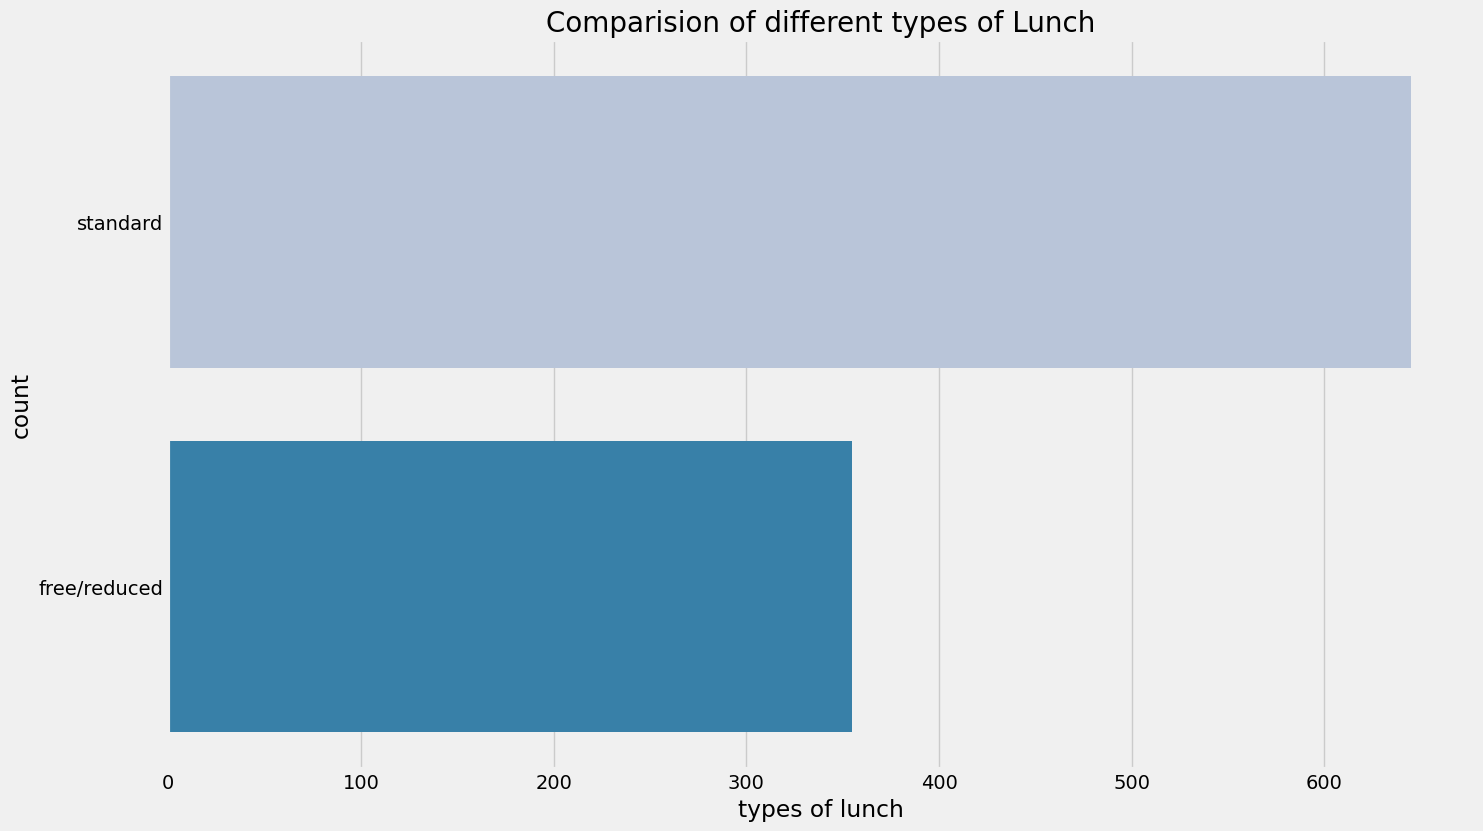

In [40]:
# Lunch type
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-v0_8-dark-palette')

sns.countplot(df['lunch'], palette='PuBu')
plt.title('Comparision of different types of Lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

In [ ]:
# print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


<Axes: xlabel='lunch', ylabel='writing_score'>

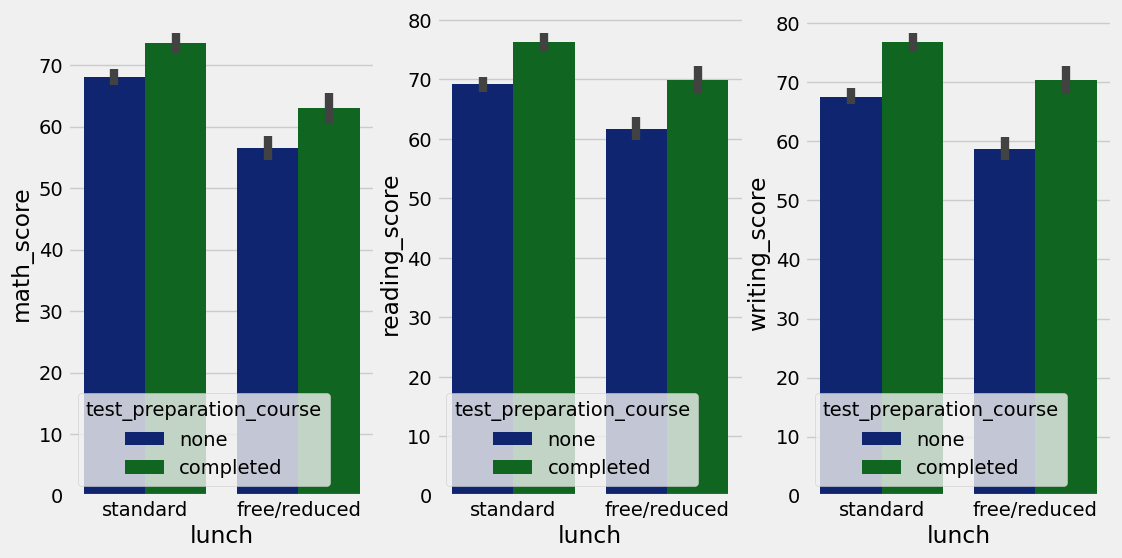

In [41]:
# Test preparation course
plt.figure(figsize = (12,6))
plt.subplot(1,3,1)
sns.barplot(x=df['lunch'], y=df['math_score'] , hue=df['test_preparation_course'])
plt.subplot(1,3,2)
sns.barplot(x=df['lunch'], y=df['reading_score'] , hue=df['test_preparation_course'])
plt.subplot(1,3,3)
sns.barplot(x=df['lunch'], y=df['writing_score'] , hue=df['test_preparation_course'])


#### Check for outliers

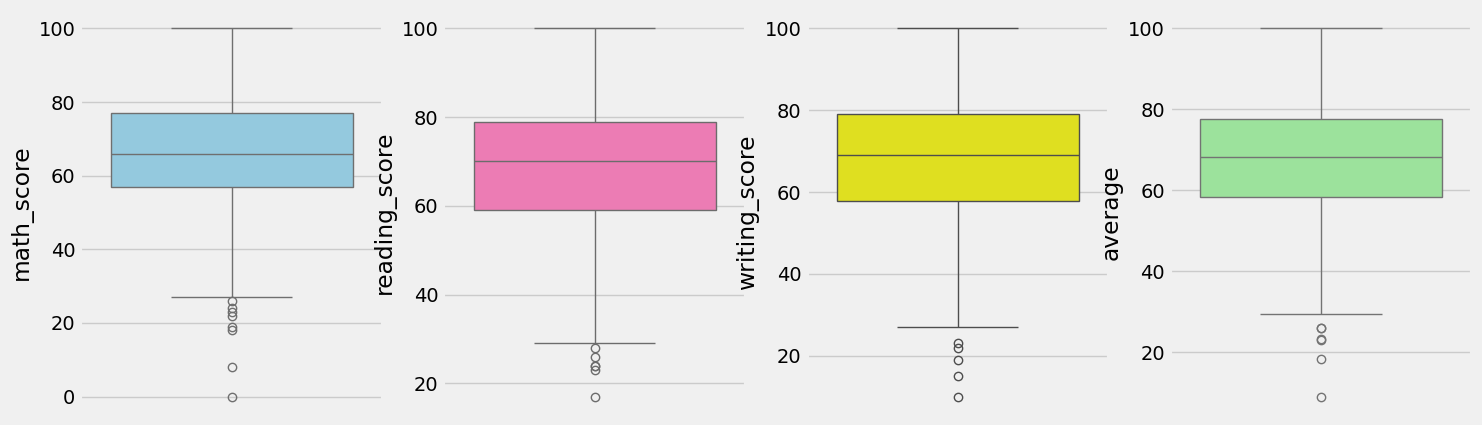

In [42]:
plt.subplots(1,4,figsize=(16, 5))
plt.subplot(141)
sns.boxplot(df['math_score'], color='skyblue')

plt.subplot(142)
sns.boxplot(df['reading_score'], color='hotpink')

plt.subplot(143)
sns.boxplot(df['writing_score'], color='yellow')


plt.subplot(144)
sns.boxplot(df['average'], color='lightgreen')
plt.show()



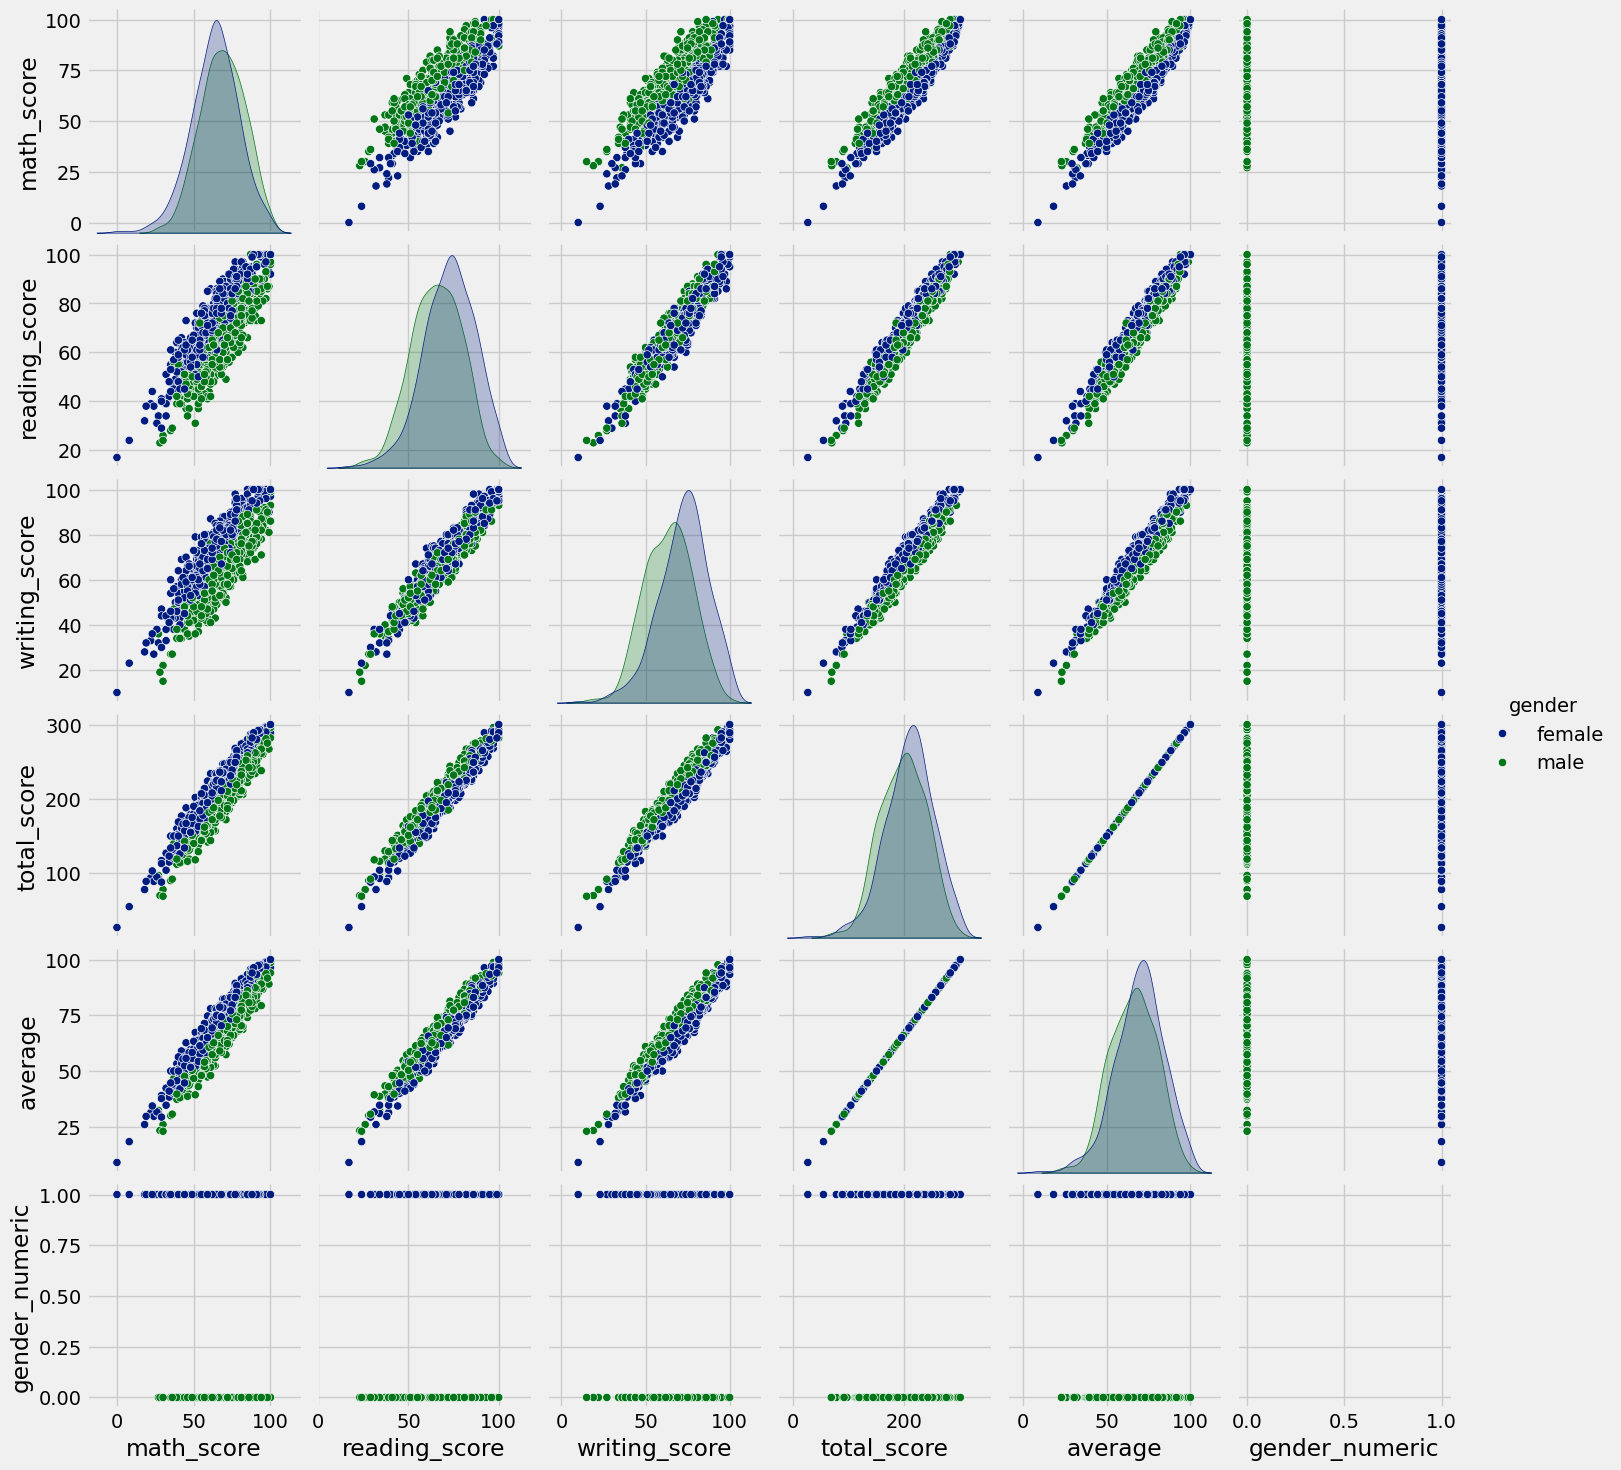

In [43]:
# Multivariate analysis using pairplot
sns.pairplot(df, hue = 'gender')
plt.show()

It is clear that scores increases linearly with each other.

CONCLUSIONS:

- Student's performance is related with parameters like parental level of education, lunch type, race.
- Female students are high scorer than males.
- Based on test preparation course their performance is not varying.
- Completing the course is beneficial for all.



In [44]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average,gender_numeric
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,1
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,1
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,0
4,male,group C,some college,standard,none,76,78,75,229,76.333333,0


In [45]:
df.drop('gender_numeric', axis = 1, inplace =True)

In [46]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
